# Practice Question

## GMM

1.1. Build a GMM on the Iris data (first 2 features) and tune your model for different covariance types.

1.2. Plot the results as shown in the hands on.

## LDA

2.1. Perform Linear Discriminant Analysis on the Iris Data (first 2 features). 

2.2. Plot the results as shown in the hands on.

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from sklearn import datasets
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for simplicity
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

In [12]:
for cov in ['full', 'tied', 'diag', 'spherical']:

    clf = GaussianMixture(n_components=3, covariance_type=cov)
    clf.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                for i in range(3)])
    clf.fit(X_train, y_train)
    pred = clf.predict(X_val)
    print ('Validation accuracy for covariance type '+ cov + ' = ' + str(accuracy_score(y_val, pred)))

Validation accuracy for covariance type full = 0.666666666667
Validation accuracy for covariance type tied = 0.708333333333
Validation accuracy for covariance type diag = 0.791666666667
Validation accuracy for covariance type spherical = 0.666666666667


In [13]:
# Best for diag

X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

clf = GaussianMixture(n_components=3, covariance_type='diag')
clf.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                for i in range(3)])
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.766666666667


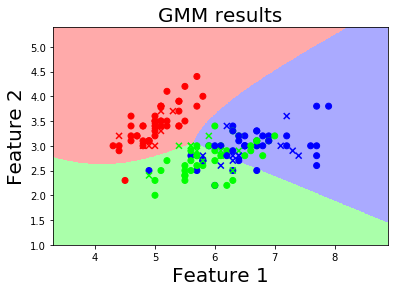

In [14]:
# Best for diag

from matplotlib.colors import ListedColormap

h = .008  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='x', cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1', fontsize=20)
plt.ylabel('Feature 2', fontsize=20)
plt.title("GMM results", fontsize=20)

plt.show()

# Fisher Discriminant Analysis

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Intialize
clf = LinearDiscriminantAnalysis()
# Train
clf.fit(X_train, y_train)
# Test
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# print the accuracy
print ('Training accuracy = ' + str(np.sum(y_train_pred == y_train)/len(y_train)))
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

Training accuracy = 0.808333333333
Test accuracy = 0.833333333333


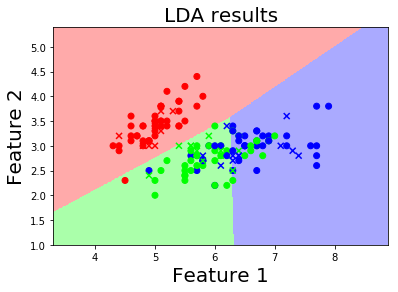

In [16]:
from matplotlib.colors import ListedColormap

h = .008  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='x', cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1', fontsize=20)
plt.ylabel('Feature 2', fontsize=20)
plt.title("LDA results", fontsize=20)


plt.show()

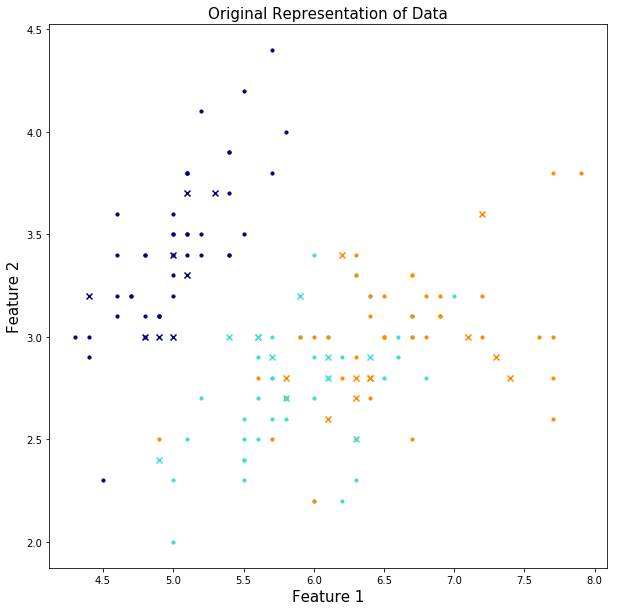

In [8]:
n_classes = len(np.unique(y_train))
colors = ['navy', 'turquoise', 'darkorange']

# Plot
plt.figure(figsize=(10,10))
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[(y_train == n)]
    plt.scatter(train_data[:,0], train_data[:,1], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data[:,0], test_data[:,1], marker='x', color=color)


    
# plt.xticks(())
# plt.yticks(())
plt.title('Original Representation of Data', fontsize=15)

plt.show()

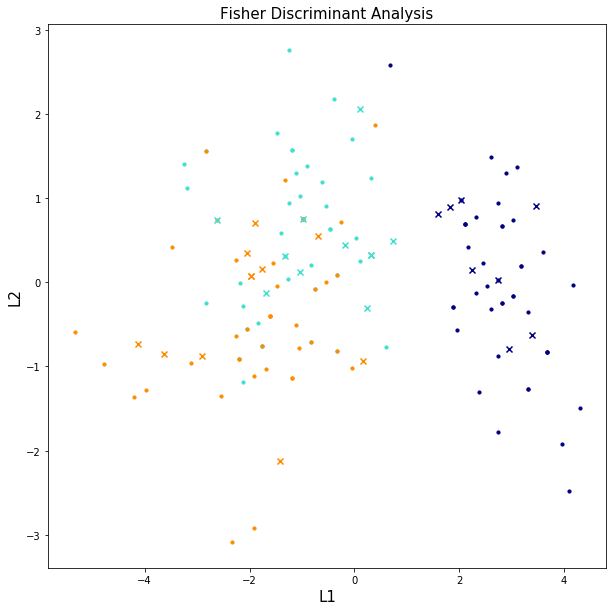

In [17]:
X_transform = clf.fit(X_train, y_train).transform(X_train)
X_test_transform = clf.transform(X_test)

# Plot
plt.figure(figsize=(10,10))
plt.xlabel('L1', fontsize=15)
plt.ylabel('L2', fontsize=15)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_transform[(y_train == n)]
    plt.scatter(train_data[:,0], train_data[:,1], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test_transform[(y_test == n)]
    plt.scatter(test_data[:,0], test_data[:,1], marker='x', color=color)

    
# plt.xticks(())
# plt.yticks(())
plt.title('Fisher Discriminant Analysis', fontsize=15)

plt.show()
